## Modeling Assessed Value of Single Family Homes in Boston
### 2019 Property Assessment Dataset

#### Janaki E. Viswanathan

#### Dataset link: https://data.boston.gov/dataset/property-assessment

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model

## Process
### To analyze the dataset the SEMMA process will be followed. Sample → Explore → Modify → Model → Assess.


## 1. Sample
### -- Gather data and import data into Pandas dataframe
### -- Select all rows with PTYPE =101(Single Family Homes records)
### -- Drop all columns/variables not associated with single family homes.


In [2]:
# Read in the Boston Property dataset. Make sure to specified file location.
data = pd.read_csv('C:/ISTM615/ISTM601/Project/fy19fullpropassess.csv')

C:\Users\AnalyticsStudent\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Check to see if all attributes and records were read.
print('Number of records:')
print(data.shape[0])
print('Number of attributes:')
print(data.shape[1])

# Print the top 5 records to validate data has been read correctly.
print(data.head())
print("Datatype and variable information")
data.info()

Number of records:
174668
Number of attributes:
75
         PID        CM_ID     GIS_ID ST_NUM ST_NAME ST_NAME_SUF UNIT_NUM  \
0  502550008  502550000.0  502550000     87  BEACON          ST      2-F   
1  502550010  502550000.0  502550000     87  BEACON          ST      2-R   
2  502550012  502550000.0  502550000     87  BEACON          ST      3-F   
3  502550014  502550000.0  502550000     87  BEACON          ST      3-R   
4  502550016  502550000.0  502550000     87  BEACON          ST        4   

   ZIPCODE  PTYPE  LU   ...   U_BTH_STYLE2 U_BTH_STYLE3 U_KITCH_TYPE  \
0   2108.0    102  CD   ...              M          NaN            O   
1   2108.0    102  CD   ...            NaN          NaN            O   
2   2108.0    102  CD   ...              S          NaN            O   
3   2108.0    102  CD   ...            NaN          NaN            O   
4   2108.0    102  CD   ...              M            M            O   

  U_KITCH_STYLE U_HEAT_TYP U_AC  U_FPLACE  U_INT_FIN  U_INT

In [4]:
# Filter Single family homes using property type, PTYPE, 101.
sfhomes = data[data['PTYPE']== 101]
print('Number of records:')
print(sfhomes.shape[0])
print('Number of attributes:')
print(sfhomes.shape[1])
print(sfhomes.head())

Number of records:
30568
Number of attributes:
75
           PID  CM_ID     GIS_ID  ST_NUM    ST_NAME ST_NAME_SUF UNIT_NUM  \
25   502555000    NaN  502555000       2     BEAVER          ST      NaN   
80   100021000    NaN  100021000  243 HF  LEXINGTON          ST      NaN   
86   100027000    NaN  100027000      33   PRESCOTT          ST      NaN   
92   100033000    NaN  100033000     246  PRINCETON          ST      NaN   
101  100041000    NaN  100041000     224  PRINCETON          ST      NaN   

     ZIPCODE  PTYPE  LU   ...   U_BTH_STYLE2 U_BTH_STYLE3 U_KITCH_TYPE  \
25    2108.0    101  R1   ...            NaN          NaN          NaN   
80    2128.0    101  R1   ...            NaN          NaN          NaN   
86    2128.0    101  R1   ...            NaN          NaN          NaN   
92    2128.0    101  R1   ...            NaN          NaN          NaN   
101   2128.0    101  R1   ...            NaN          NaN          NaN   

    U_KITCH_STYLE U_HEAT_TYP U_AC  U_FPLACE  U_I

In [5]:
# Identify columns with all missing values. These columns will need to be dropped.
count = 0
for i in sfhomes:
    if sfhomes[i].count() == 0:
        print(i)
        count = count +1
print ("There are ",count, " rows with all missing values")

UNIT_NUM
S_NUM_BLDG
S_BLDG_STYL
S_UNIT_RES
S_UNIT_COM
S_UNIT_RC
S_EXT_FIN
S_EXT_CND
U_BASE_FLOOR
U_NUM_PARK
U_CORNER
U_ORIENT
U_TOT_RMS
U_BDRMS
U_FULL_BTH
U_HALF_BTH
U_BTH_STYLE
U_BTH_STYLE2
U_BTH_STYLE3
U_KITCH_TYPE
U_KITCH_STYLE
U_HEAT_TYP
U_AC
U_FPLACE
U_INT_FIN
U_INT_CND
U_VIEW
There are  27  rows with all missing values


In [6]:
## Drop 27 rows with all missing values:
sfhomes=sfhomes.dropna(axis=1, how='all',  inplace=False)

In [7]:
# Check the number of rows to verify non single family homes were dropped.
print('Number of records:')
print(sfhomes.shape[0])
print('Number of attributes:')
print(sfhomes.shape[1])


Number of records:
30568
Number of attributes:
48


In [8]:
# Drop Columns that don't provide valuable information to the model, such as street name.
sfhomes.drop(['CM_ID','GIS_ID', 'ST_NAME_SUF','PID','ST_NUM','ST_NAME','OWNER','OWN_OCC','MAIL_ADDRESSEE','MAIL_ADDRESS',
              'MAIL CS','MAIL_ZIPCODE'], axis=1, inplace = True)

# Verify columns were dropped and records remain the same.
print('Number of records:')
print(sfhomes.shape[0])
print('Number of attributes:')
print(sfhomes.shape[1])

Number of records:
30568
Number of attributes:
36


## 2. Explore
### -- Looking for data issues & relationships among the attributes
####        - Missing Value Imputation 

In [9]:
# Indetify columns with any missing values.
for i in sfhomes:
    if sfhomes[i].count() < sfhomes.shape[0]:
        print(i, " ",sfhomes.shape[0]- sfhomes[i].count())

LAND_SF   9
YR_REMOD   1715
STRUCTURE_CLASS   365
R_BTH_STYLE2   7895
R_BTH_STYLE3   24007
R_KITCH_STYLE2   29630
R_KITCH_STYLE3   30544


In [10]:
# Count missing values for LAND_SF
print('Count of missing values in LAND_SF')
print(np.count_nonzero(sfhomes['LAND_SF'].isnull()))

# Calculate the mean of LAND_SF to impute missing values.
sfhomes['LAND_SF'].mean()

# Impute missing values with mean.
sfhomes['LAND_SF'].fillna(sfhomes['LAND_SF'].mean(), inplace=True)

# Verify missing values were imputed.
print('Count of missing values in LAND_SF after imputing')
print(np.count_nonzero(sfhomes['LAND_SF'].isnull()))

Count of missing values in LAND_SF
9
Count of missing values in LAND_SF after imputing
0


In [11]:
# Identify number of missing values and the mode for Structure_Class
print('Count of missing values in STRUCTURE_CLASS ')
print(np.count_nonzero(sfhomes['STRUCTURE_CLASS'].isnull()))
print("Mode: " , sfhomes['STRUCTURE_CLASS'].mode())
print()

# Convert structure class into category and impute missing value with Mode.
sfhomes['STRUCTURE_CLASS']=sfhomes['STRUCTURE_CLASS'].astype('category')
sfhomes['STRUCTURE_CLASS'].fillna(sfhomes['STRUCTURE_CLASS'].value_counts().index[0], inplace=True)

# Verify all missing values were imputed with the mode.
print('Count of missing values in STRUCTURE_CLASS after imputing')
print(np.count_nonzero(sfhomes['STRUCTURE_CLASS'].isnull()))

Count of missing values in STRUCTURE_CLASS 
365
Mode:  0    R
dtype: object

Count of missing values in STRUCTURE_CLASS after imputing
0


In [12]:
#### Impute missing values and '0' values in YR_REMOD with values in YR_BUILT Column

# Count number of missing values
print('Count of missing values in YR_REMOD ')
print(np.count_nonzero(sfhomes['YR_REMOD'].isnull()))

# Replace missing values with year built values
sfhomes['YR_REMOD'].fillna(sfhomes['YR_BUILT'],inplace=True)

print('Count of missing values in YR_REMOD after imputing missing values: ')
print(np.count_nonzero(sfhomes['YR_REMOD'].isnull()))

# Replace year value '0' with YR_BUILT value
sfhomes['YR_REMOD'].replace(0,sfhomes['YR_BUILT'], inplace = True)

print('Count of missing values in YR_REMOD after imputing missing and zeros: ')
print(np.count_nonzero(sfhomes['YR_REMOD'].isnull()))

Count of missing values in YR_REMOD 
1715
Count of missing values in YR_REMOD after imputing missing values: 
0
Count of missing values in YR_REMOD after imputing missing and zeros: 
0


In [13]:
# Indetify columns with any missing values.
for i in sfhomes:
    if sfhomes[i].count() < sfhomes.shape[0]:
        print(i, " ",sfhomes.shape[0]- sfhomes[i].count())

R_BTH_STYLE2   7895
R_BTH_STYLE3   24007
R_KITCH_STYLE2   29630
R_KITCH_STYLE3   30544


In [14]:
# Investigate R_BTH_STYLE2 missing values and replace them with N/A

# Check records to see if Half baths are considered in the style columns
sfhomes_baths = sfhomes[sfhomes['R_FULL_BTH']== 1][['R_FULL_BTH','R_HALF_BTH','R_BTH_STYLE2']]
print(sfhomes_baths.head())

# Calculate total number of baths (full and half)
sfhomes['TOTAL_BATHS'] = sfhomes['R_FULL_BTH'] + sfhomes['R_HALF_BTH']

sfhomes['R_BTH_STYLE2'] = np.where((sfhomes['TOTAL_BATHS'] <2), 'N/A', sfhomes['R_BTH_STYLE2'])

# Check for missing values
print()
print('Count of missing values in R_BTH_STYLE2')
print(np.count_nonzero(sfhomes['R_BTH_STYLE2'].isnull()))

     R_FULL_BTH  R_HALF_BTH R_BTH_STYLE2
25          1.0         0.0          NaN
80          1.0         0.0          NaN
86          1.0         1.0            S
92          1.0         1.0            M
112         1.0         1.0            N

Count of missing values in R_BTH_STYLE2
0


In [15]:
### Investigate R_BTH_STYLE3 missing values and replace them with N/A
sfhomes['R_BTH_STYLE3'] = np.where((sfhomes['TOTAL_BATHS'] <3), 'N/A', sfhomes['R_BTH_STYLE3'])

# Check for missing values
print('Count of missing values in R_BTH_STYLE3')
print(np.count_nonzero(sfhomes['R_BTH_STYLE3'].isnull()))

Count of missing values in R_BTH_STYLE3
0


In [16]:
# Investigate R_KITH_STYLE2 and R_KITH_STYLE3  missing values and replace them with N/A

# Make missing values N/A if record doesn't meet criteria specified.
sfhomes['R_KITCH_STYLE2'] = np.where((sfhomes['R_KITCH'] <2), 'N/A', sfhomes['R_KITCH_STYLE2'])
sfhomes['R_KITCH_STYLE3'] = np.where((sfhomes['R_KITCH'] <3), 'N/A', sfhomes['R_KITCH_STYLE3'])

# Check for missing values in R_KITH_STYLE2 and R_KITH_STYLE3
print('Count of missing values in R_KITCH_STYLE2')
print(np.count_nonzero(sfhomes['R_KITCH_STYLE2'].isnull()))
print('Count of missing values in R_KITCH_STYLE3')
print(np.count_nonzero(sfhomes['R_KITCH_STYLE3'].isnull()))

Count of missing values in R_KITCH_STYLE2
0
Count of missing values in R_KITCH_STYLE3
0


In [17]:
# Final check for missing values
print("Number of Missing Values in colums")
for i in sfhomes:
    if sfhomes[i].count() < sfhomes.shape[0]:
        print(sfhomes.shape[0]-sfhomes[i].count(), " ", i )
    else:
        print('No missing values', " - ", i)

Number of Missing Values in colums
No missing values  -  ZIPCODE
No missing values  -  PTYPE
No missing values  -  LU
No missing values  -  AV_LAND
No missing values  -  AV_BLDG
No missing values  -  AV_TOTAL
No missing values  -  GROSS_TAX
No missing values  -  LAND_SF
No missing values  -  YR_BUILT
No missing values  -  YR_REMOD
No missing values  -  GROSS_AREA
No missing values  -  LIVING_AREA
No missing values  -  NUM_FLOORS
No missing values  -  STRUCTURE_CLASS
No missing values  -  R_BLDG_STYL
No missing values  -  R_ROOF_TYP
No missing values  -  R_EXT_FIN
No missing values  -  R_TOTAL_RMS
No missing values  -  R_BDRMS
No missing values  -  R_FULL_BTH
No missing values  -  R_HALF_BTH
No missing values  -  R_BTH_STYLE
No missing values  -  R_BTH_STYLE2
No missing values  -  R_BTH_STYLE3
No missing values  -  R_KITCH
No missing values  -  R_KITCH_STYLE
No missing values  -  R_KITCH_STYLE2
No missing values  -  R_KITCH_STYLE3
No missing values  -  R_HEAT_TYP
No missing values  -  R

## 3.0 Modify
### -- Attribute Encoding
### -- Transform data/ create new attributes.
### -- Partition data into training & assessment


<Figure size 1224x720 with 0 Axes>

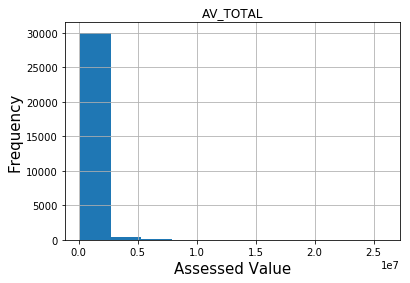

<Figure size 1224x720 with 0 Axes>

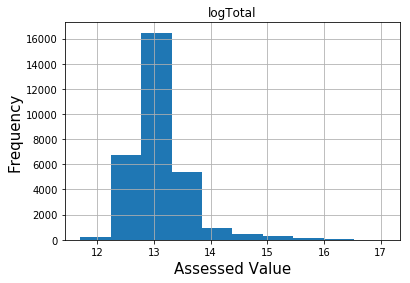

In [18]:
# Plot regular AV_Total
AV_TOTAL =plt.figure(figsize=(17,10))
sfhomes.hist(column='AV_TOTAL')
plt.xlabel("Assessed Value",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

#### 1. logTotal - AV_Total is not normal. It has to be Log transformed.
sfhomes["logTotal"] = np.log(sfhomes['AV_TOTAL'])

# Plot logged AV_Total
logTotal =plt.figure(figsize=(17,10))
sfhomes.hist(column='logTotal')
plt.xlabel("Assessed Value",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

In [19]:
# Age - Calculate age of home
t1 = datetime.now()
sfhomes['Age'] = t1.year - sfhomes['YR_BUILT']

#Display values to verify calculation was sucessful
print("Age calculation for the top 5 records:")
sfhomes['Age'].head()

Age calculation for the top 5 records:


25     120.0
80     110.0
86     120.0
92     100.0
101    120.0
Name: Age, dtype: float64

In [20]:
# Calculate number of years since last remodeled.
sfhomes['YR_SINCE_REMOD'] = t1.year - sfhomes['YR_REMOD']
print("Years Since Remodeled calculation for the top 5 records:")
print(sfhomes['YR_SINCE_REMOD'].head())

# Verify columns were added to dataframe
sfhomes.dtypes

Years Since Remodeled calculation for the top 5 records:
25      27.0
80      55.0
86      40.0
92     100.0
101    120.0
Name: YR_SINCE_REMOD, dtype: float64


ZIPCODE             float64
PTYPE                 int64
LU                   object
AV_LAND               int64
AV_BLDG               int64
AV_TOTAL              int64
GROSS_TAX             int64
LAND_SF             float64
YR_BUILT            float64
YR_REMOD            float64
GROSS_AREA          float64
LIVING_AREA         float64
NUM_FLOORS          float64
STRUCTURE_CLASS    category
R_BLDG_STYL          object
R_ROOF_TYP           object
R_EXT_FIN            object
R_TOTAL_RMS         float64
R_BDRMS             float64
R_FULL_BTH          float64
R_HALF_BTH          float64
R_BTH_STYLE          object
R_BTH_STYLE2         object
R_BTH_STYLE3         object
R_KITCH             float64
R_KITCH_STYLE        object
R_KITCH_STYLE2       object
R_KITCH_STYLE3       object
R_HEAT_TYP           object
R_AC                 object
R_FPLACE            float64
R_EXT_CND            object
R_OVRALL_CND         object
R_INT_CND            object
R_INT_FIN            object
R_VIEW              

In [21]:
# Drop Columns Not required for analysis due to leakage variables or duplicate information
sfhomes.drop(['PTYPE', 'LU','YR_BUILT','YR_REMOD','TOTAL_BATHS','GROSS_TAX','AV_BLDG','AV_LAND' ],axis=1, inplace = True)

In [22]:
# Create excel file with cleaned and useful modeling columns
sfhomes.to_csv("cleaned_sfhomes.csv", sep=',')

In [23]:
# Use one-hot to encode categorical variables
sfhomes_model = pd.get_dummies(sfhomes, columns=['ZIPCODE','STRUCTURE_CLASS', 'R_BLDG_STYL', 'R_ROOF_TYP',
                                                   'R_EXT_FIN','R_BTH_STYLE', 'R_BTH_STYLE2', 'R_BTH_STYLE3', 
                                                   'R_KITCH', 'R_KITCH_STYLE','R_KITCH_STYLE2', 'R_KITCH_STYLE3', 
                                                   'R_HEAT_TYP', 'R_AC', 'R_FPLACE','R_EXT_CND', 'R_OVRALL_CND', 
                                                    'R_INT_CND', 'R_INT_FIN', 
                                                   'R_VIEW'], drop_first=False)

# Verify columns were created and old variables were dropped.
print('Number of records:')
print(sfhomes_model.shape[0])
print('Number of attributes:')
print(sfhomes_model.shape[1])
sfhomes_model.head()

Number of records:
30568
Number of attributes:
160


,AV_TOTAL,LAND_SF,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,R_HALF_BTH,logTotal,...,R_INT_CND_G,R_INT_CND_P,R_INT_FIN_E,R_INT_FIN_N,R_INT_FIN_S,R_VIEW_A,R_VIEW_E,R_VIEW_F,R_VIEW_G,R_VIEW_P
25,2678800,1225.0,2016.0,1478.0,2.0,5.0,2.0,1.0,0.0,14.800879,...,1,0,0,1,0,1,0,0,0,0
80,234500,1238.0,1836.0,1122.0,2.0,5.0,3.0,1.0,0.0,12.365211,...,0,0,0,1,0,0,0,1,0,0
86,375800,1650.0,3076.0,1968.0,2.0,8.0,4.0,1.0,1.0,12.836812,...,0,0,0,1,0,1,0,0,0,0
92,371500,2500.0,2079.0,1111.0,1.5,9.0,4.0,1.0,1.0,12.825304,...,0,0,0,1,0,1,0,0,0,0
101,392000,2500.0,2167.0,1146.0,1.5,8.0,4.0,2.0,0.0,12.879017,...,0,0,0,1,0,1,0,0,0,0


In [24]:
# Get list of predictor names for future use in plots and results table.
names = list(sfhomes_model.drop(['logTotal', 'AV_TOTAL'],axis =1))
namesdf = sfhomes_model.drop(['logTotal', 'AV_TOTAL'],axis =1)

# Convert Pandas dataframe into numpy arrays so we can use scikit-learn Random Forest and linear regression

# Set numpy array for predictors
x =np.asarray(sfhomes_model.drop(['logTotal', 'AV_TOTAL'],axis =1))
# Set Target varialbe
y = np.asarray(sfhomes_model['logTotal'])

# Create training and validation dataset using 70/30 split.
X_train, X_validate, y_train, y_validate = train_test_split(x, y,test_size = 0.3, random_state=12345)

## 4. Model
#### Fit Random Forest Model

## 5. Assess

In [26]:
dt = DecisionTreeRegressor(max_depth =best_depth,\
                            min_samples_split =5,\
                            min_samples_leaf=5)
dt = dt.fit(X_train,y_train)


# Predict values for Training and Validation datasets
yd_tpred = dt.predict(X_train)
yd_vpred = dt.predict(X_validate)

In [27]:
    t_rf_r2 = r2_score(y_train, yd_tpred)
    t_rf_mae = metrics.mean_absolute_error(y_train, yd_tpred)
    t_rf_mse = metrics.mean_squared_error(y_train, yd_tpred)
    t_rf_rmse = np.sqrt(metrics.mean_squared_error(y_train, yd_tpred))
    
    
    v_rf_r2 = metrics.r2_score(y_validate, yd_vpred)
    v_rf_mae = metrics.mean_absolute_error(y_validate, yd_vpred)
    v_rf_mse = metrics.mean_squared_error(y_validate, yd_vpred)
    v_rf_rmse = np.sqrt(metrics.mean_squared_error(y_validate, yd_vpred))

In [28]:
    print('%s Results' % 'Decision Tree Results')
    print()
    print('Training Results:')
    print('R-Squared:',t_rf_r2)
    print('Mean Absolute Error:', t_rf_mae)       
    print('Mean Squared Error:', t_rf_mse)
    print('Root Mean Squared Error:', t_rf_rmse )
    
    
    print()
    print('Validation Results:')
    print('R-Squared:', v_rf_r2)
    print('Mean Absolute Error:', v_rf_mae )  
    print('Mean Squared Error:', v_rf_mse)  
    print('Root Mean Squared Error:',v_rf_rmse )


Decision Tree Results Results

Training Results:
R-Squared: 0.7735283548420895
Mean Absolute Error: 0.173473712107199
Mean Squared Error: 0.05671945854420235
Root Mean Squared Error: 0.2381584735931148

Validation Results:
R-Squared: 0.7489557404017166
Mean Absolute Error: 0.18057911513498023
Mean Squared Error: 0.06160905731883214
Root Mean Squared Error: 0.24821171873791967


In [29]:
# Create a new dataframe with only independent variables. This will be used for printing coeficients
sfhomes_model1 = sfhomes_model.drop(['logTotal','AV_TOTAL'], axis =1)

In [30]:
# # Create pandas series containining the feature importance values idexed by the column/feature names
temp2 = list(sfhomes_model1.columns)
feat_importances = pd.Series(dt.feature_importances_, index= temp2)

In [31]:
# Print values of top 10 most important features
print('Top 10 Most Important Features')
print(feat_importances.nlargest(10).sort_values(ascending=False))

Top 10 Most Important Features
NUM_FLOORS          0.392877
R_BTH_STYLE3_N/A    0.122800
R_INT_FIN_E         0.119274
LIVING_AREA         0.109785
ZIPCODE_2130.0      0.049425
R_EXT_FIN_B         0.046939
ZIPCODE_2119.0      0.017690
ZIPCODE_2136.0      0.017650
GROSS_AREA          0.015136
ZIPCODE_2127.0      0.014670
dtype: float64


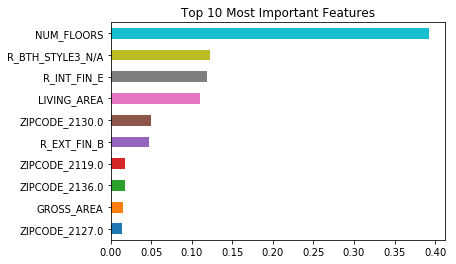

In [32]:
# Plot the 10 most important features
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh', title='Top 10 Most Important Features')

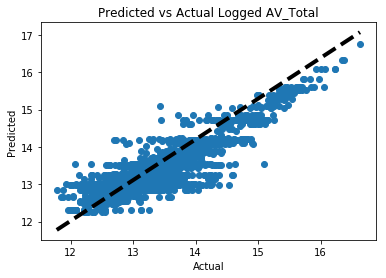

In [33]:
# Print Actuals vs predicted
fig, ax = plt.subplots()
ax.scatter(y_validate, yd_vpred)
ax.plot([y_validate.min(), y_validate.max()], [y_validate.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Predicted vs Actual Logged AV_Total')
plt.show()

In [36]:
# Libraries to Print Decision Tree
from sklearn.tree import export_graphviz
import graphviz
from pydotplus.graphviz import graph_from_dot_data

In [37]:
dot_data = export_graphviz(dt, filled = True, rounded = True, \
                      feature_names = temp2,\
                          
                          out_file = None)



graph = graph_from_dot_data(dot_data)
graph_pdf = graphviz.Source(dot_data) 
graph_pdf.view("tree")
print(graph)

## Random Forest

In [34]:
# Use k-fold validation to find the best parameter combination for the random forest using the training dataset.

# Lists of parameters combinations being tested.
max_depth_list = [5, 10, 12]
n_trees_list = [50, 75, 100]
score_list = ['neg_mean_squared_error', 'neg_mean_absolute_error']
score_names = ['MSE', 'MAE']
min_mse = 1e64

for n_trees in n_trees_list:
    for d in max_depth_list:
        print("\nNumber of Trees: ", n_trees, " Max_Depth: ", d)
        rfr = RandomForestRegressor(n_estimators=n_trees, \
            criterion='mse', max_depth=d, max_features='auto',\
                                    min_samples_split=2, n_jobs=1, random_state=12345)
        # Using 5 folds to cross validate
        scores = cross_validate(rfr, X_train, y_train, scoring=score_list, \
                                return_train_score=False, cv=5)
        
        # Keep track of best combination based on lowest MSE score
        print("{:.<13s}{:>13s}{:>30s}".format("Metric", "Mean", "Std. Dev."))
        i=0
        for s in score_list:
            var = "test_"+s
            mean = math.fabs(scores[var].mean())
            std = scores[var].std()
            label = score_names[i]
            i += 1
            print("{:.<13s}{:>20.4f}{:>25.4f}".format(label, mean, std))
            if label == 'MSE' and mean < min_mse:
                min_mse = mean
                best_depth = d
                best_n_trees = n_trees

# Print best parameter combination
print("\nBest based on MSE from a forest with ", best_n_trees, " trees.")
print("Best Depth (trees) = ", best_depth)


Number of Trees:  50  Max_Depth:  5
Metric.......         Mean                     Std. Dev.
MSE..........              0.0660                   0.0021
MAE..........              0.1898                   0.0038

Number of Trees:  50  Max_Depth:  10
Metric.......         Mean                     Std. Dev.
MSE..........              0.0345                   0.0012
MAE..........              0.1330                   0.0023

Number of Trees:  50  Max_Depth:  12
Metric.......         Mean                     Std. Dev.
MSE..........              0.0293                   0.0011
MAE..........              0.1213                   0.0020

Number of Trees:  75  Max_Depth:  5
Metric.......         Mean                     Std. Dev.
MSE..........              0.0658                   0.0022
MAE..........              0.1894                   0.0041

Number of Trees:  75  Max_Depth:  10
Metric.......         Mean                     Std. Dev.
MSE..........              0.0344                   0.0

## 5. Assess

In [37]:
# Use the hold out method to validate the best parameters. Use the whole training dataset vs Validation dataset.
rfr = RandomForestRegressor(n_estimators=best_n_trees, criterion="mse", \
                            max_depth=best_depth, min_samples_split=2, \
                            min_samples_leaf=1, max_features='auto', \
                            n_jobs=1, bootstrap=True, random_state=12345)
rfr= rfr.fit(X_train, y_train)

# Predict values for Training and Validation datasets
yrf_tpred = rfr.predict(X_train)
yrf_vpred = rfr.predict(X_validate)

In [41]:
t_rf_r2 = r2_score(y_train, yrf_tpred)
t_rf_mae = metrics.mean_absolute_error(y_train, yrf_tpred)
t_rf_mse = metrics.mean_squared_error(y_train, yrf_tpred)
t_rf_rmse = np.sqrt(metrics.mean_squared_error(y_train, yrf_tpred))
    
    
v_rf_r2 = metrics.r2_score(y_validate, yrf_vpred)
v_rf_mae = metrics.mean_absolute_error(y_validate, yrf_vpred)
v_rf_mse = metrics.mean_squared_error(y_validate, yrf_vpred)
v_rf_rmse = np.sqrt(metrics.mean_squared_error(y_validate, yrf_vpred))

In [42]:
    print('%s Results' % 'Decision Tree Results')
    print()
    print('Training Results:')
    print('R-Squared:',t_rf_r2)
    print('Mean Absolute Error:', t_rf_mae)       
    print('Mean Squared Error:', t_rf_mse)
    print('Root Mean Squared Error:', t_rf_rmse )
    
    
    print()
    print('Validation Results:')
    print('R-Squared:', v_rf_r2)
    print('Mean Absolute Error:', v_rf_mae )  
    print('Mean Squared Error:', v_rf_mse)  
    print('Root Mean Squared Error:',v_rf_rmse )

Decision Tree Results Results

Training Results:
R-Squared: 0.9208626369107018
Mean Absolute Error: 0.10125077049872509
Mean Squared Error: 0.01981982504658001
Root Mean Squared Error: 0.14078290040548253

Validation Results:
R-Squared: 0.8817303895263492
Mean Absolute Error: 0.12025674588389752
Mean Squared Error: 0.029024679641776317
Root Mean Squared Error: 0.17036631017245257


Top 10 Most Important Features
NUM_FLOORS          0.339803
LIVING_AREA         0.143439
R_INT_FIN_E         0.089001
R_BTH_STYLE3_N/A    0.062427
ZIPCODE_2130.0      0.049809
R_EXT_FIN_B         0.035992
LAND_SF             0.031065
ZIPCODE_2129.0      0.022872
ZIPCODE_2136.0      0.022502
GROSS_AREA          0.022420
dtype: float64


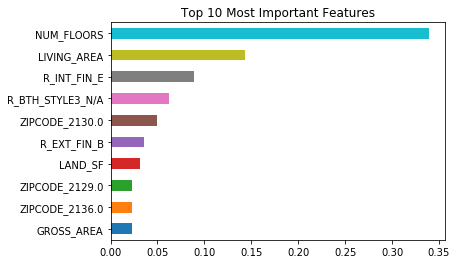

In [43]:
# Create pandas series containining the feature importance values idexed by the column/feature names
feat_importances = pd.Series(rfr.feature_importances_, index=namesdf.columns)

# Print values of top 10 most important features
print('Top 10 Most Important Features')
print(feat_importances.nlargest(10).sort_values(ascending=False))

# Plot the 10 most important features
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh', title='Top 10 Most Important Features')

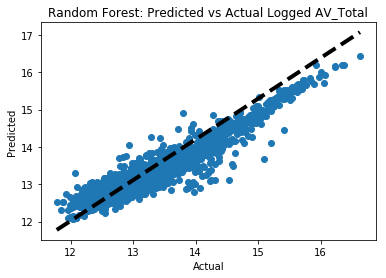

In [45]:
fig, ax = plt.subplots()
ax.scatter(y_validate, yrf_vpred)
ax.plot([y_validate.min(), y_validate.max()], [y_validate.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Random Forest: Predicted vs Actual Logged AV_Total')
plt.show()